<a href="https://colab.research.google.com/github/els285/Aachen_Intro2NN/blob/main/Exercises/1_Tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Torch Tensors

We talk about and use tensors all the time in machine learning. Tensors are really **multidimensional arrays**

You might think of a tensor like a matrix or the same thing as a tensor from mathematics (multilinear algebra, like you would find if you have studied general relativity for example). It's important to keep in mind that matrices and mathematical tensors have specific mathematical definitions and properties. Machine learning tensors are really just arrays...

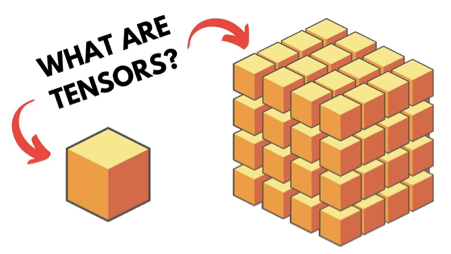

This tutorial will walk you through some basic operations with tensors using the `torch` library.

### PyTorch Official Tensor Tutorials
This tutorial is inspired by the following tutorials, which you are invited to try at your leisure. The content is similar.

Intro PyTorch Tensor tutorial: [https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html]([https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html])

In-depth PyTorch Tensor tutorial: [https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html](https://pytorch.org/tutorials/beginner/introyt/tensors_deeper_tutorial.html)

# Loading Torch

Before we begin, let's test that `torch` loads.

In [ ]:
import torch

In [ ]:
torch.__version__

'2.6.0+cu124'

If this throws an error, try restarting the notebook, or try the following

In [ ]:
!pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata
!pip3 install torch
!pip list # to see if torch is now available under the pip installations

---

# Section 1

Basic `torch.tensor` operations

## Tensor Basics

Let's create a basic tensor from a Python list

In [ ]:
import torch
T = torch.tensor([[1,2,3],[4,5,6]]) # Creates a 2x3 tensor from a nested Python list
print(T)

tensor([[1, 2, 3],
        [4, 5, 6]])


It's important to understand the shape of a given tensor

In [ ]:
T.shape

torch.Size([2, 3])

as well as the numerical type

In [ ]:
T.dtype

torch.int64

We can create tensors of specific `dtype`:

In [ ]:
T2 = torch.tensor([[7,8],[9,10]],dtype=torch.float32)

The main selling point of torch tensors is that they are designed to run on GPUs, so let's understand GPU-compatibility right away

In [ ]:
# Define device as the device that PyTorch will use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
T3 = T2.to(device)

Check whether the tensor is stored on the GPU

In [ ]:
print(T3.is_cuda)
print(T3.device)

True
cuda:0


We can create tensors filled with specific values e.g. zeros, ones, or random numbers

In [ ]:
print(torch.zeros(3, 3))    # A 3x3 tensor (2-dimensional) of zeros
print(torch.ones(4, 4, 2))   # A 4x4x2 tensor(3-dimensional) of ones
print(torch.rand(2, 3))      # A 2x3 (2-dimensional) tensor of random numbers between 0 and 1


tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.],
         [1., 1.]]])
tensor([[0.5671, 0.5685, 0.7194],
        [0.9324, 0.6263, 0.4437]])


In the above examples, the integers correspond to the size in each dimension. You can create a tensor in as many dimensions as you like - though it quickly gets hard to imagine and slower to compute

In [ ]:
four_dimensional_tensor = torch.rand(3,4,7,5)
print(four_dimensional_tensor.shape)
print(print(four_dimensional_tensor)

## Tensor Arithmetic

Tensors follow basic arithmetic

In [ ]:
tensor1 = torch.tensor([1, 2, 3])
tensor2 = torch.tensor([4, 5, 6])

In [ ]:
# Operations with a scalar
print(tensor1 + 2)
print(tensor1 - 2)
print(tensor1 * 2)
print(tensor1 / 2)

And more importantly, you can apply arithmetic operations between tensors

In [ ]:
# Addition
print(tensor1 + tensor2)
# Subtraction
print(tensor1 - tensor2)
# Element-wise multiplication
print(tensor1 * tensor2)
# Element-wise division
print(tensor1 / tensor2)
# Element-wise exponentiation
print(tensor2**tensor1)

Note that operations are applied element-wise e.g. multiplication is not like vector or matrix multiplication

**Very important rule**: tensor operations only work if the dimensionality of the tensors is compatible!

In [ ]:
tensor3 = torch.tensor([1, 2, 3])
tensor4 = torch.tensor([4, 5, 6, 7])

tensor3+tensor4

More advanced mathematical operations are applied to each element separately

In [ ]:
print(torch.sqrt(tensor1))
print(torch.log(tensor1))
print(torch.cos(tensor1))

---

# Task 1

A simple physics kinematics problem using tensors


Let's consider 100 projecticles fired with random initial velocities and random initial angles, and compute some basic kinematics.

* Create a tensor called `u0` of shape 100x1 with random values between 0 and 50
* Create a tensor `angle` of same shape with random values between 0 and pi/2.
* Compute the vertical component of initial velocity of each projectile ($ v_0^y = u_0 \sin(\theta) $)
* Compute the vertical displacement of each projectile after one second ($ y = v_0^yt + \frac{1}{2}gt^2$)

**Trickier**:
* Compute the trajectories of all particles simultaneously over a 5 second window. Create an array `time = torch.linspace(0,5,1000)` to do this. (This is a simple example of "*broadcasting*")

The image below is just for illustration :/

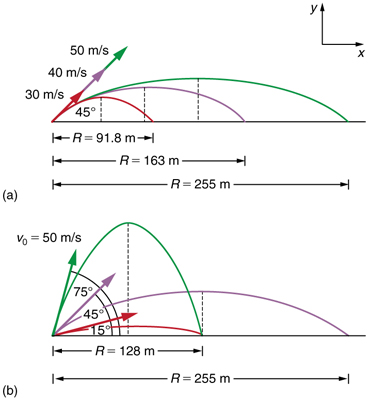

In [ ]:
# @title Task 1A solution {"display-mode":"form"}
# Initialise 10 random velocities
u0 = 50*torch.rand(10,1)

print(f"Initial speed tensor: {u0}")

# Initialise 100 random angles (less than 90 degrees)
angle = torch.pi/2*torch.rand(10,1)

print(f"Angle tensor: {u0}")

# Compute the vertical component of initial velocity
u0_vertical = u0*torch.sin(angle)

print(f"Initial vertical speed tensor: {u0_vertical}")

# Compute the vertical displacement
g = -9.8
t = 3
vert_displacement = u0_vertical + 0.5*g*t**2

print(f"Vertical displacement tensor after 3 seconds : {vert_displacement}")


In [ ]:
# @title Task 1B solution {"display-mode":"form"}
time_array = torch.linspace(0,5,1000)

x_array = u0*torch.cos(angle)*time_array
y_array = u0*torch.sin(angle)*time_array -0.5*9.8*time_array**2

print(x_array)
print(y_array)

# Bonus: plotting the trajectories
import matplotlib.pyplot as plt
for i in range(10):
  plt.scatter(x_array[i],y_array[i])
  plt.xlabel("x")
  plt.ylabel("y")



---

# Section 2

Combining, indexing and statistically analysing tensors

## Combining Tensors

In [ ]:
tensor1 = torch.tensor([1, 2, 3])
tensor2 = torch.tensor([4, 5, 6])

The `stack` operation combines tensors along a new dimension

In [ ]:
# Stack vertically (along dim=0)
print(torch.stack((tensor1, tensor2), dim=0))

# Stack horizontally (along dim=1)
print(torch.stack((tensor1, tensor2), dim=1))


The `concatenate` operation combines tensors along an existing dimension

In [ ]:
print(torch.cat((tensor1, tensor2), dim=0))

Some reshaping operations for changing the shape of tensors

In [ ]:
print(tensor1.reshape(-1,1))
print(tensor1.reshape(-1,1).shape)


## Other Operations


Filtering operations create a mask and then apply it to every element

In [ ]:
# Applying a mask to select only events greater than 0.5
tensor1 = torch.rand(100)
mask = tensor1 > 0.5

print(tensor1.shape)
print(mask)

filtered_tensor = tensor1[mask]
print(filtered_tensor)
print(filtered_tensor.shape)

There are also many built in statistical operations

In [ ]:
# Compute the maximum, minimum and mean values of tensor1

max  = torch.max(tensor1)
min  = torch.min(tensor1)
mean = torch.mean(tensor1)

print(max, min, mean)

Operations which find the index of the query are also useful

In [ ]:
# Finding the argument of the maximum and minimum values of tensor1

max_index = torch.argmax(tensor1)
min_index = torch.argmin(tensor1)

print(max_index, min_index)

---

# Task 2

Let's make some pretend Large Hadron Collider data.

**1. Creating data:**
* Create a tensor corresponding to the $x$ component of momentum of 1000 different particles. The mean should be 0 and the standard deviation 100 (the units here are GeV but this is not important)
* Create similar tensors for the $y$ and $z$ momenta components
* Compute a tensor for the energy using the relation $E^2 = p_x^2 + p_y^2 + p_z^2 + m^2$ where we will assume the mass to be zero.
* Combine the four tensors into one tensor of shape (10000,4)

**2. Index operations:**
* Find the index of particles with the largest and the smallest energy in the array
* Find the index of the particle with $p_z$ closest to the mean

**3. Applying a filter**
* Filter the array: return a sub-array containing only particles (rows) which have $\sqrt{p_x^2 + p_y^2} > 50$

**4. Normalising the data**
* For each column of the array, normalise each element in the column by subtracting the mean of the column and then dividing by the standard deviation the column. This is called Z-score normalisation, and a common practice in machine learning.
* If you're bored, try a different normalisation: normalise each column such that the values lie between -1 and +1.

### Hints

In [ ]:
# Sampling from a normal distribution with standard deviation 100 GeV
n_events = 1000
std_dev = 100
px = std_dev*torch.randn(n_events)


### Solutions

In [ ]:
# @title Creating the momenta and energy tensors {"display-mode":"form"}
# Number of events
n_events = 10000

# Rest mass of the particle (assumed to be 1.0 for this example)
m = 0.0

# Randomly generate 3-momentum components (px, py, pz)
std_dev = 100
px = std_dev*torch.randn(n_events)
py = std_dev*torch.randn(n_events)
pz = std_dev*torch.randn(n_events)

# Calculate the energy E using the relativistic energy-momentum relation
E = torch.sqrt(px**2 + py**2 + pz**2 + m**2)

# Stack the 4-momentum components into a tensor of shape (n_events, 4)
momentum_tensor = torch.stack((px, py, pz, E), dim=1)

print(momentum_tensor)
print(momentum_tensor.shape)  # Should be (1000, 4)

In [ ]:
# @title Indexing {"display-mode":"form"}

# Use torch.argmax and torch.argmin to find the index of the maximum and minimum values of the energy
print(torch.argmax(momentum_tensor[:,3]))
print(torch.argmin(momentum_tensor[:,3]))

# The value closest to the mean will be one
deviation_from_mean = torch.abs(momentum_tensor[:,2]-torch.mean(momentum_tensor[:,2]))
print(torch.argmin(deviation_from_mean))



In [ ]:
# @title Filtering

# Apply a mask to filter out events with momentum magnitude greater than 50
px2 = momentum_tensor[:,0]**2
py2 = momentum_tensor[:,1]**2
mask = torch.sqrt(px2 + py2)>50
filtered_momentum_tensor = momentum_tensor[mask]

# Print the results
print(filtered_momentum_tensor.shape)
print(filtered_momentum_tensor)


In [ ]:
# @title Z-score Normalisation

# Scale every column by the mean

normalised_momentum_tensor = (filtered_momentum_tensor - torch.mean(filtered_momentum_tensor, dim=0)) / torch.std(filtered_momentum_tensor, dim=0)
print(normalised_momentum_tensor)

# Conclusions and Extensions



This was designed to be a lightning-fast tour of some basic tensor features with `torch`.

We did not cover more complex operations like broadcasting and linear algebra operations.

You will no doubt become more familiar with tensor operations if you use PyTorch for building ML models. In my opinion, the most important thing is to understand the shape and dimensionality of the tensor you are looking at: many of my PyTorch errors come down to trying to do operations on tensors with incompatible sizes.